<a href="https://colab.research.google.com/github/da-on-git/recognize_speech_command/blob/main/PrepareAudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plot the spectrum of an entire example clip from the speech command dataset. Let the x-axis show the frequency in Hz.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
from pathlib import Path
example_audio_path = Path('/content/drive/MyDrive/Colab Notebooks/RecSpeech/ffd2ba2f_nohash_1.wav')

Mounted at /content/drive


In [2]:
import librosa as lb
y, sr = lb.load(example_audio_path, sr=None)

In [3]:
import numpy as np
#length of the windowed signal after padding with zeros, a power of 2.
n_fft = 2048
hop_length = n_fft // 4
# y: np.ndarray [shape=(channel_number…, n)], real-valued
# hop_length: number of audio samples between adjacent STFT columns.defaults to win_length // 4
#
D = lb.stft(y, hop_length=hop_length)
#The number of rows, frequency bins, in the STFT matrix D is (1 + n_fft/2)
print(D.shape, hop_length)

(1025, 32) 512


In [4]:
freqs = lb.fft_frequencies(sr=sr, n_fft=n_fft)
print(freqs.shape)
frames = range(D.shape[1])
times = lb.frames_to_time(frames, sr=sr, hop_length=hop_length, n_fft=n_fft)
times.shape

(1025,)


(32,)

In [5]:
ft = np.abs(D)
print(ft.shape)
ps = ft.sum(axis=1) / ft.shape[1]
ps.shape

(1025, 32)


(1025,)

Text(0, 0.5, 'Amplitude')

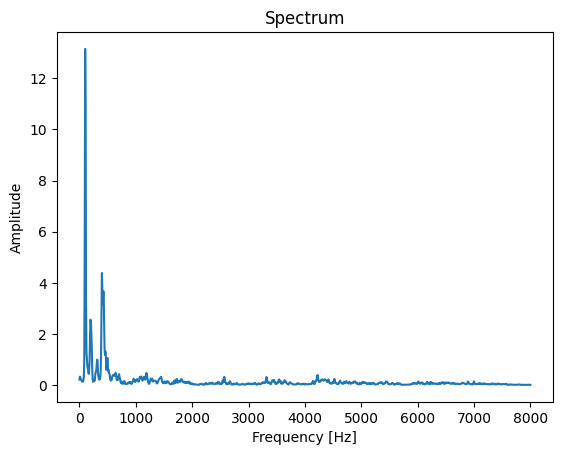

In [6]:
import matplotlib.pyplot as plt
plt.plot(freqs,ps)
plt.title('Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')


Generate and display a Spetogram

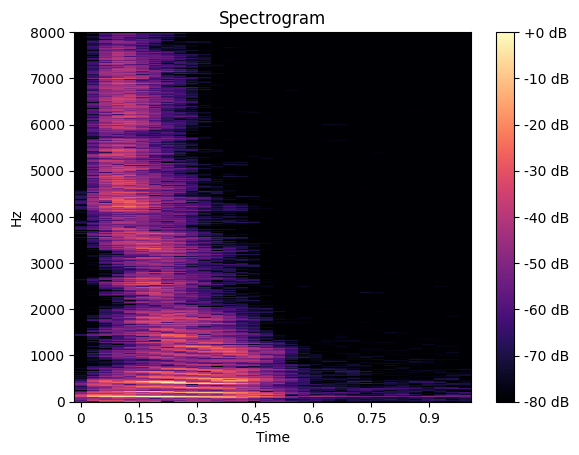

In [9]:
spec = lb.amplitude_to_db(ft, ref=np.max)
lb.display.specshow(spec, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')


Display mel spectrogram

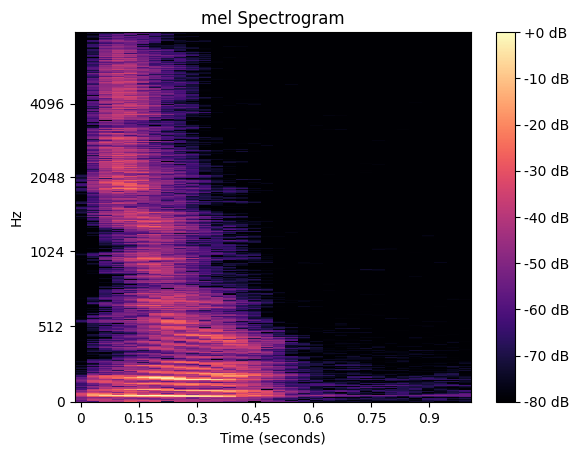

In [14]:
lb.display.specshow(spec, sr=sr, hop_length=hop_length, x_axis='s', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('mel Spectrogram');

A convenient function that generates the mel spectrogram

(128, 32)


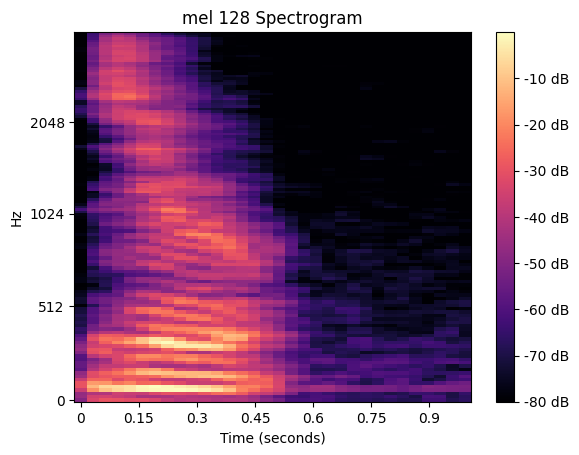

In [38]:
n_mels = 128
S = lb.feature.melspectrogram(y=y, sr=sr,  n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
print(S.shape)
S_dB = lb.power_to_db(S, ref=np.max)
lb.display.specshow(S_dB, x_axis='s', y_axis='mel',
                    sr=sr, hop_length=hop_length,
                    fmax=4000)
plt.colorbar(format='%+2.0f dB')
plt.title(f'mel {n_mels} Spectrogram');